In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv('train.csv')

# View basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))


Descriptive Statistics:
         PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count


Age Distribution:
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Missing Age values: 177


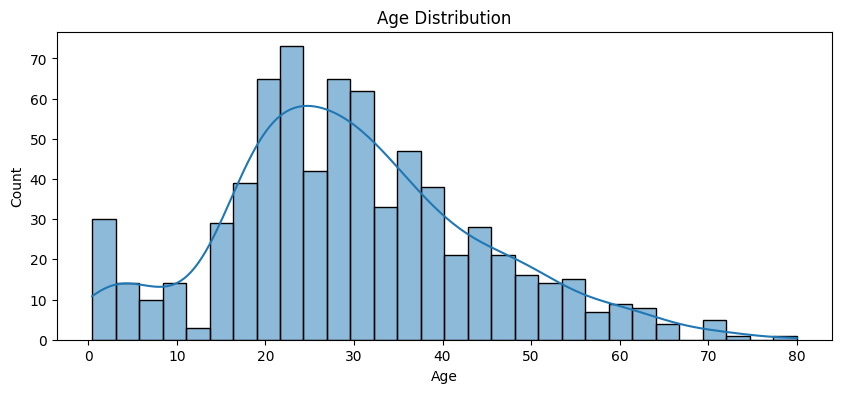

In [ ]:
# Univariate Analysis - Age
print("\nAge Distribution:\n", df['Age'].describe())
print("Missing Age values:", df['Age'].isnull().sum())

plt.figure(figsize=(10, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


Fare Distribution:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Fare Skewness: 4.787316519674893


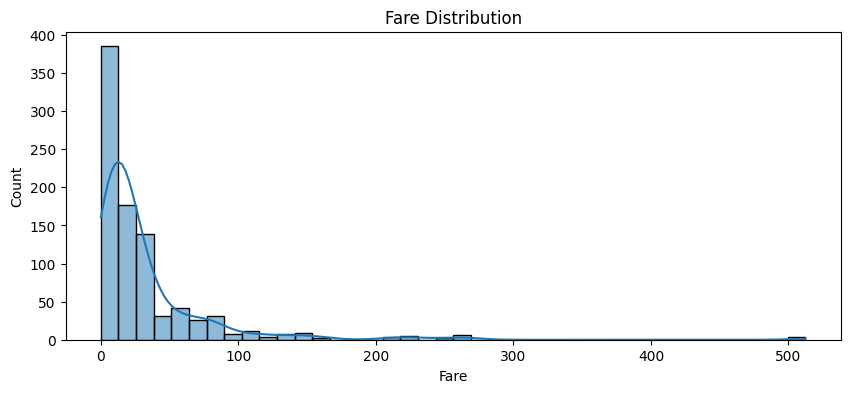

In [ ]:
# Univariate Analysis - Fare
print("\nFare Distribution:\n", df['Fare'].describe())
print("Fare Skewness:", df['Fare'].skew())

plt.figure(figsize=(10, 4))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

In [ ]:
# Outliers
outliers = df[df['Fare'] > df['Fare'].quantile(0.99)]
print("\nTop 1% Expensive Fares:\n", outliers[['Name', 'Fare']])


Top 1% Expensive Fares:
                                       Name      Fare
27          Fortune, Mr. Charles Alexander  263.0000
88              Fortune, Miss. Mabel Helen  263.0000
258                       Ward, Miss. Anna  512.3292
311             Ryerson, Miss. Emily Borie  262.3750
341         Fortune, Miss. Alice Elizabeth  263.0000
438                      Fortune, Mr. Mark  263.0000
679     Cardeza, Mr. Thomas Drake Martinez  512.3292
737                 Lesurer, Mr. Gustave J  512.3292
742  Ryerson, Miss. Susan Parker "Suzette"  262.3750



Embarked Value Counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Missing Embarked values: 2


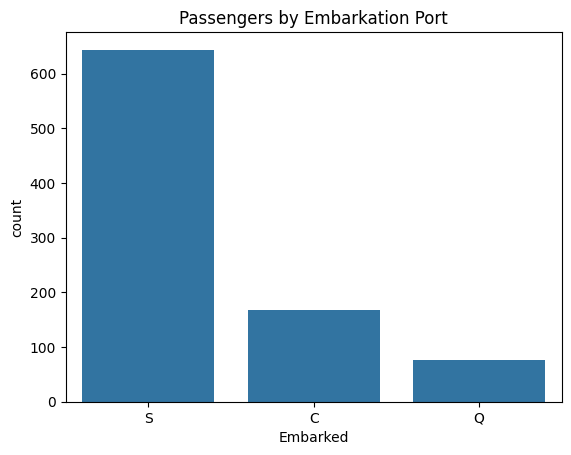

In [ ]:
# Embarkation Analysis
print("\nEmbarked Value Counts:\n", df['Embarked'].value_counts())
print("Missing Embarked values:", df['Embarked'].isnull().sum())

sns.countplot(data=df, x='Embarked')
plt.title("Passengers by Embarkation Port")
plt.show()


Gender Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


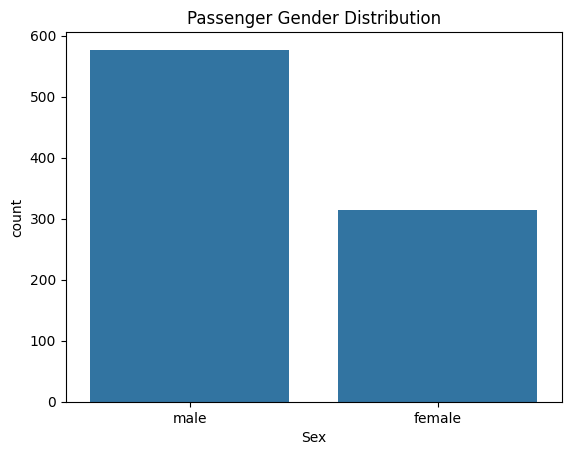

In [ ]:
# Passenger Gender
print("\nGender Distribution:\n", df['Sex'].value_counts())

sns.countplot(data=df, x='Sex')
plt.title("Passenger Gender Distribution")
plt.show()


Passenger Class Distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


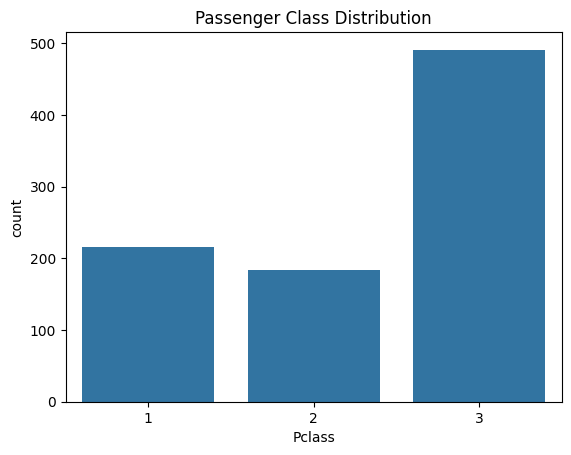

In [ ]:
# Passenger Class
print("\nPassenger Class Distribution:\n", df['Pclass'].value_counts())

sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

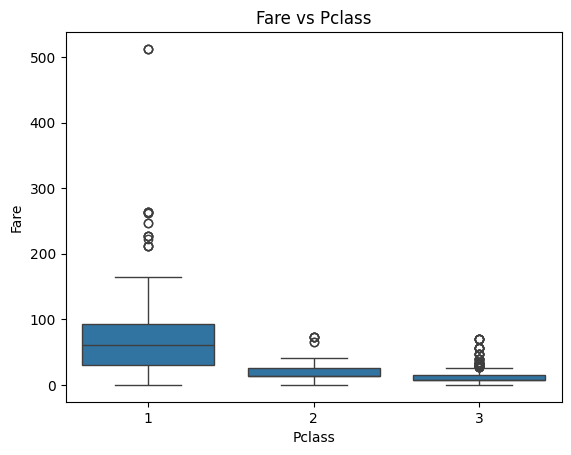

In [ ]:
#Bivariate Analysis
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare vs Pclass")
plt.show()


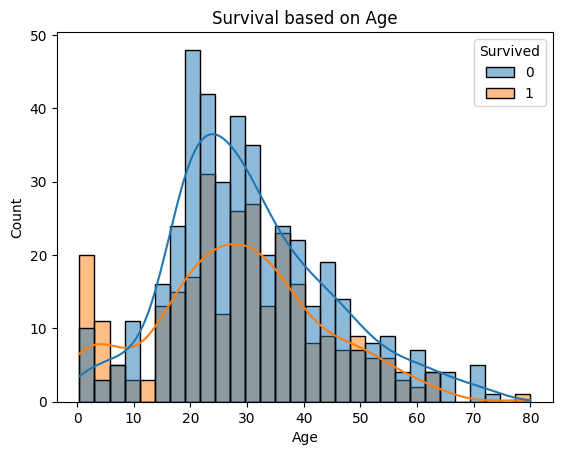

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Survival based on Age")
plt.show()

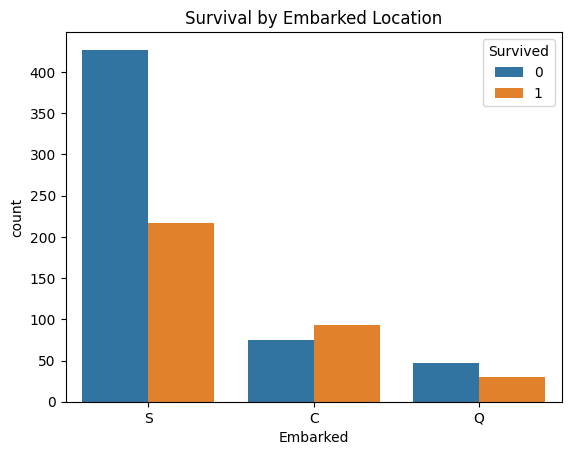

In [ ]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Embarked Location")
plt.show()

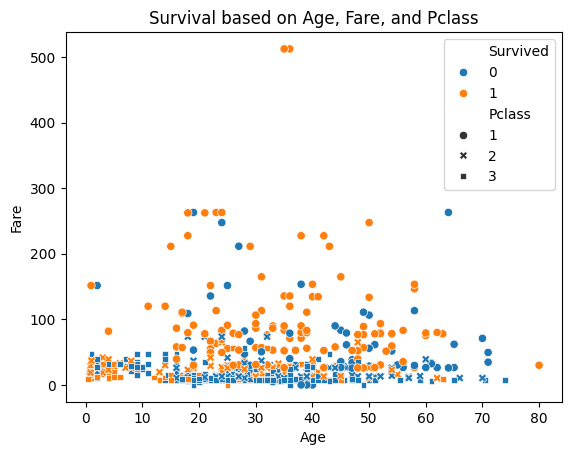

In [ ]:
#multivariate analysis
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Pclass')
plt.title("Survival based on Age, Fare, and Pclass")
plt.show()

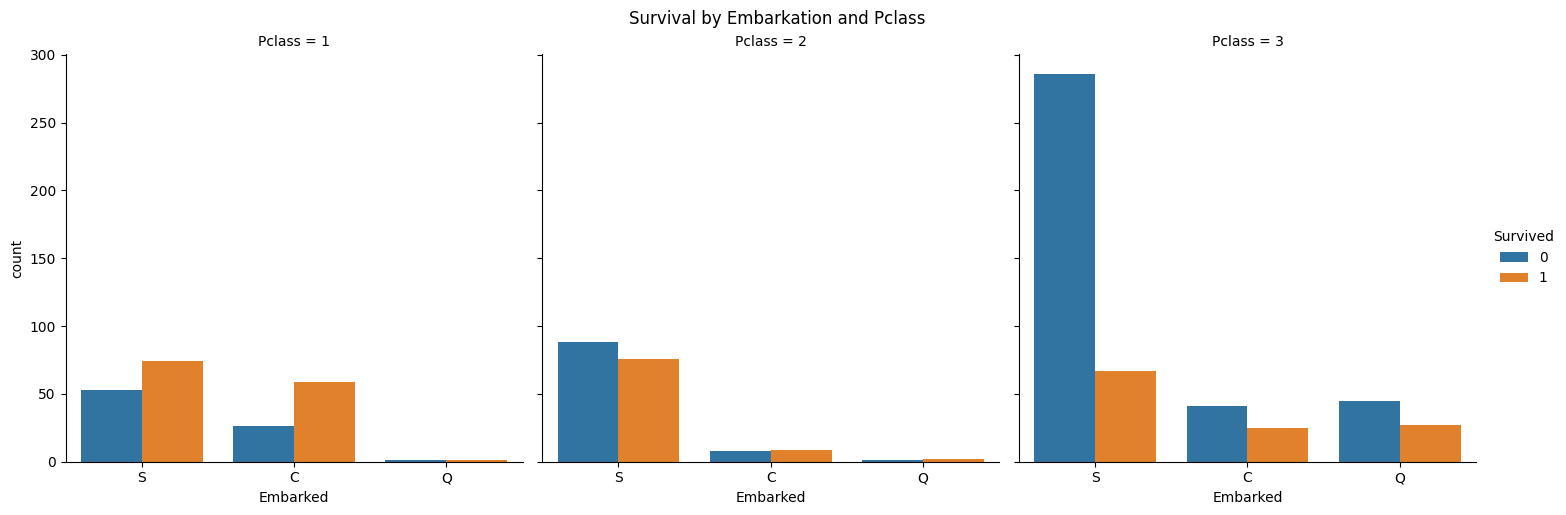

In [ ]:
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count')
plt.suptitle("Survival by Embarkation and Pclass", y=1.02)
plt.show()

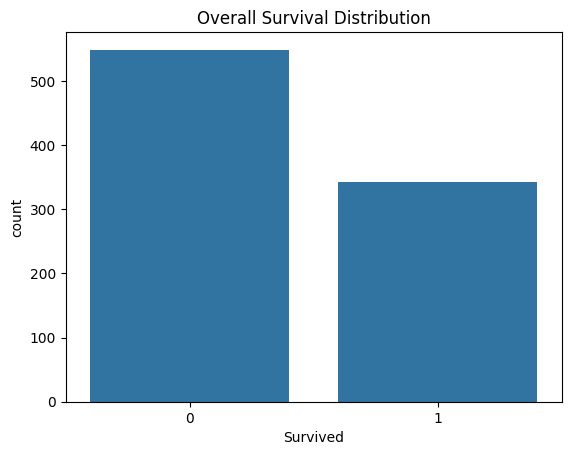

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Survived')
plt.title("Overall Survival Distribution")
plt.show()

print(df['Survived'].value_counts(normalize=True))  # Percentage

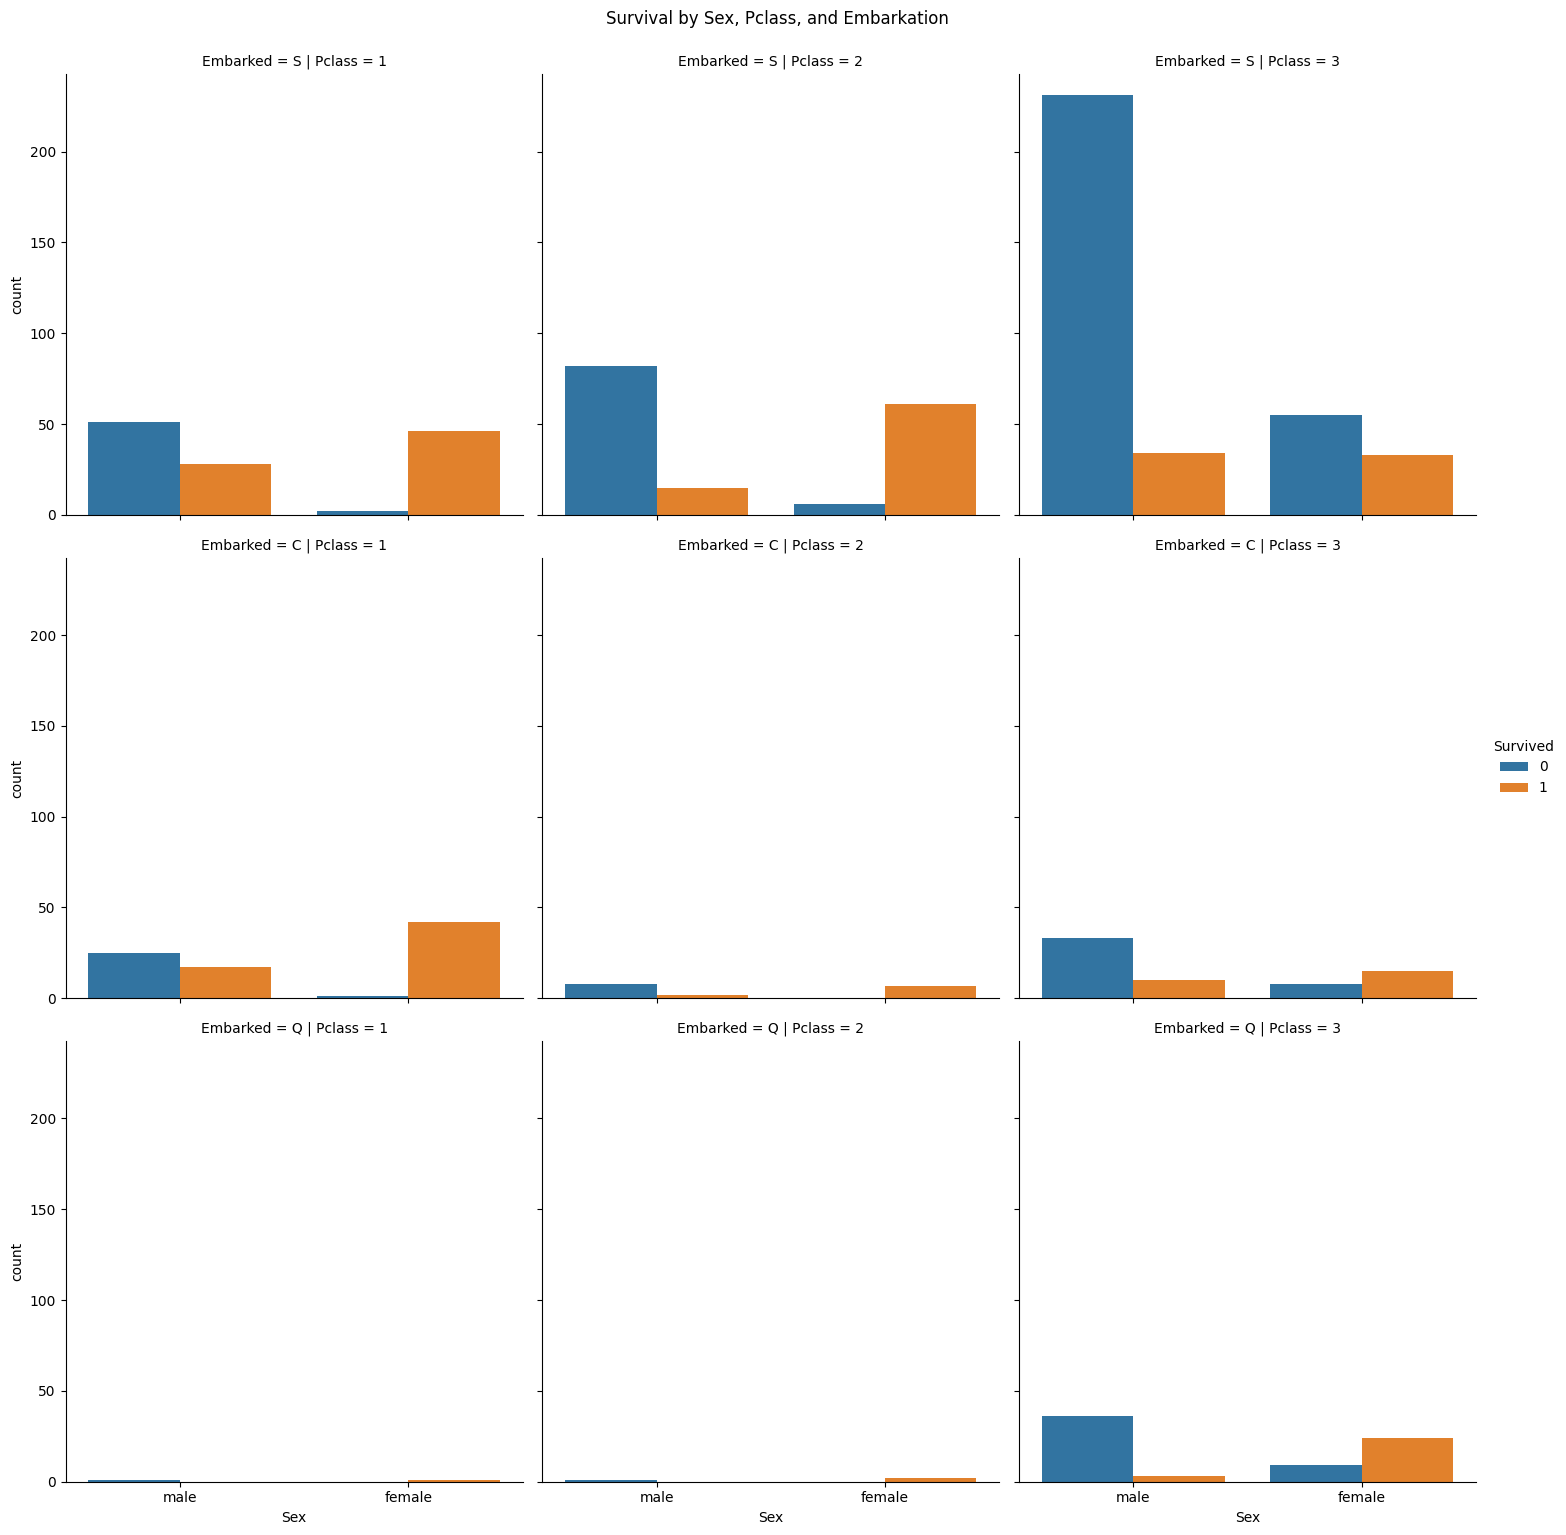

In [ ]:
sns.catplot(data=df, x='Sex', hue='Survived', col='Pclass', row='Embarked', kind='count')
plt.suptitle("Survival by Sex, Pclass, and Embarkation", y=1.02)
plt.show()